# <div align = center>MNIST: تصنيف الأرقام المكتوبة بخط اليد

<hr>

#1 - المكتبات (Librairies)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 2 - البيانات  (Data)

## 2.1 - تحميل البيانات

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


## 2.4 -  تغيير شكل المخرجات

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test,  10)

# 3- الشبكة العصبية

## 3.1 - النموذج

In [ ]:
model = tf.keras.Sequential(
    [
      tf.keras.layers.Conv2D( 5, kernel_size=(3, 3), strides=1, padding='valid', activation="relu", name='Conv1_05_3x3' , input_shape=(28, 28, 1)),
      tf.keras.layers.Conv2D(20, kernel_size=(5, 5), strides=2, padding='valid', activation="relu", name='Conv2_20_5x5'),        
      tf.keras.layers.Conv2D(40, kernel_size=(5, 5), strides=1, padding='valid', activation="relu", name='Conv3_40_5x5'),
     
      tf.keras.layers.Flatten(),  
      
      tf.keras.layers.Dense(units=1960, activation='relu'   , name='Hidden_Layer_1'),
      tf.keras.layers.Dense(units= 128, activation='relu'   , name='Hidden_Layer_2'),    
      tf.keras.layers.Dense(units=  64, activation='relu'   , name='Hidden_Layer_3'),    
      tf.keras.layers.Dense(units=  10, activation='softmax', name='Prediction'),
    ]
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1_05_3x3 (Conv2D)       (None, 26, 26, 5)         50        
                                                                 
 Conv2_20_5x5 (Conv2D)       (None, 11, 11, 20)        2520      
                                                                 
 Conv3_40_5x5 (Conv2D)       (None, 7, 7, 40)          20040     
                                                                 
 flatten (Flatten)           (None, 1960)              0         
                                                                 
 Hidden_Layer_1 (Dense)      (None, 1960)              3843560   
                                                                 
 Hidden_Layer_2 (Dense)      (None, 128)               251008    
                                                                 
 Hidden_Layer_3 (Dense)      (None, 64)                8

## 3.2 - الرسم البياني للنموذج 

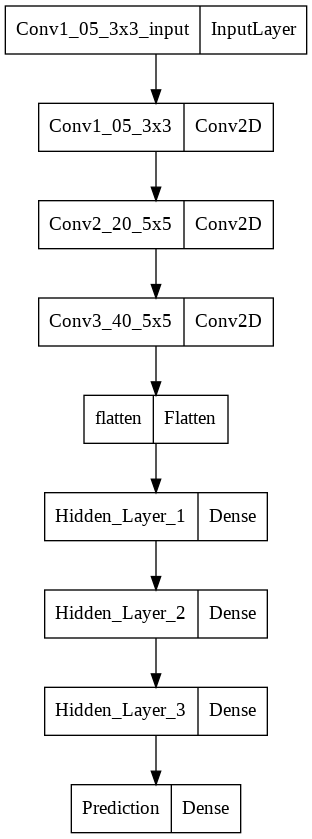

In [ ]:
tf.keras.utils.plot_model(model, to_file='Mnist_CNN.png')

## 3.3 -  تركيب النموذج 

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

## 3.4 - تدريب النموذج



In [ ]:
history = model.fit(x_train, y_train,
                    epochs=7,
                    batch_size=128,
                    validation_split=0.3,
                    verbose=1)

Epoch 1/7
329/329 [==============================] - 14s 17ms/step - loss: 0.6092 - accuracy: 0.8976 - val_loss: 0.1237 - val_accuracy: 0.9642
Epoch 2/7
329/329 [==============================] - 4s 13ms/step - loss: 0.0804 - accuracy: 0.9758 - val_loss: 0.0881 - val_accuracy: 0.9729
Epoch 3/7
329/329 [==============================] - 4s 13ms/step - loss: 0.0401 - accuracy: 0.9877 - val_loss: 0.0765 - val_accuracy: 0.9794
Epoch 4/7
329/329 [==============================] - 4s 13ms/step - loss: 0.0340 - accuracy: 0.9894 - val_loss: 0.1029 - val_accuracy: 0.9744
Epoch 5/7
329/329 [==============================] - 4s 13ms/step - loss: 0.0330 - accuracy: 0.9896 - val_loss: 0.0844 - val_accuracy: 0.9783
Epoch 6/7
329/329 [==============================] - 4s 13ms/step - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.0870 - val_accuracy: 0.9814
Epoch 7/7
329/329 [==============================] - 4s 13ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0896 - val_accuracy: 0.9806


## 3.5 -  التقييم


In [ ]:
loss, acc = model.evaluate(x_test, y_test,verbose=1)

print("Accuracy = %0.2f" % (acc*100), "%")

313/313 [==============================] - 2s 5ms/step - loss: 0.0751 - accuracy: 0.9808
Accuracy = 98.08 %
